In [0]:
! pip install spotipy
import spotipy
import spotipy.util as util
import pandas as pd # for later
import numpy as np

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
cid = 'bececbd52aed4495a36e543a6c51333f'
secret = 'e373c7be1cb84420a732b016d7a8f878'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager
=
client_credentials_manager)


In [0]:
from google.colab import drive
drive.mount('drive')

KeyboardInterrupt: ignored

In [0]:
playlist_data.to_csv('logistic_regression_data.csv')
!cp data.csv "drive/My Drive/"

NameError: ignored

In [0]:
def analyze_playlist(creator, playlist_id):
    
    # Create empty dataframe
    playlist_features_list = ["artist", "album", "track_name", "track_id", 
                             "danceability", "energy", "key", "loudness", "mode", "speechiness",
                             "instrumentalness", "liveness", "valence", "tempo", "duration_ms", "time_signature"]
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    # Create empty dict
    playlist_features = {}
    
    # Loop through every track in the playlist, extract features and append the features to the playlist df
    playlist = sp.user_playlist_tracks(creator, playlist_id)["items"]
    for track in playlist:
        # Get metadata
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        # Get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[4:]:
            playlist_features[feature] = audio_features[feature]
        
        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)
        
    return playlist_df

In [0]:
playlist_data = analyze_playlist("katdawg17", "5QQv14uR9NKaCIKlbVDNw8")
df = pd.DataFrame(playlist_data)

In [0]:
playlist_data

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,The Clash,London Calling (Remastered),London Calling - Remastered,5jzma6gCzYtKB1DbEwFZKH,0.651,0.801,0,-7.340,1,0.0513,0,0.0825,0.776,133.763,200480,4
1,The Clash,London Calling (Remastered),Brand New Cadillac - Remastered,7FYkZkF9fog6WS818wJnhl,0.520,0.906,9,-6.534,1,0.0601,7.96e-05,0.0925,0.868,151.606,128267,4
2,The Clash,London Calling (Remastered),Jimmy Jazz - Remastered,06JxwPA4WAg0LWADJtaldL,0.528,0.397,9,-12.024,1,0.0927,3.64e-06,0.4300,0.579,128.414,234333,4
3,The Clash,London Calling (Remastered),Hateful - Remastered,2FNsNZjUQg3bhx5dWW0pRs,0.595,0.860,7,-6.723,1,0.0524,0,0.4820,0.673,114.112,163933,4
4,The Clash,London Calling (Remastered),Rudie Can't Fail - Remastered,4W9zZsQKsqikYbKM9vcN5Q,0.636,0.684,6,-9.370,0,0.0594,0,0.0402,0.684,96.988,208867,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,The Clash,Combat Rock (Remastered),Car Jamming - Remastered,3QcqUffnkbQGWJlfyaT3yF,0.691,0.729,2,-7.717,0,0.0412,0,0.1190,0.810,92.769,239813,4
96,The Clash,Combat Rock (Remastered),Should I Stay or Should I Go - Remastered,39shmbIHICJ2Wxnk1fPSdz,0.742,0.833,2,-6.463,1,0.1150,0,0.3840,0.816,113.375,188987,4
97,The Clash,Combat Rock (Remastered),Rock the Casbah - Remastered,56KqaFSGTb7ifpt16t5Y1N,0.796,0.872,9,-6.722,0,0.0573,0,0.2840,0.866,129.894,222427,4
98,The Clash,Combat Rock (Remastered),Red Angel Dragnet - Remastered,3AySFupxPGQWjauQfFXcr0,0.759,0.729,0,-8.654,1,0.1430,0,0.2750,0.681,138.545,224240,4


In [0]:
means = df.groupby(['artist']).mean()
means

,danceability,energy,loudness,speechiness,liveness,valence,tempo
artist,,,,,,,
Jack Johnson,0.784357,0.418643,-10.377571,0.053079,0.211286,0.581000,105.621786
The Clash,0.539500,0.769849,-9.058802,0.218733,0.494238,0.637721,127.670430


In [0]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [0]:
X_stand = df[['danceability', 'energy', 'key', 'loudness', 'speechiness', 'instrumentalness']]
X_stand = preprocessing.StandardScaler().fit(X_stand).transform(X_stand)
X_stand[0:5]

array([[ 0.45019978,  0.36540232, -1.59883776,  0.48542705, -0.49767783,
        -0.19843519],
       [-0.3135424 ,  0.84308215,  0.96157858,  0.69097923, -0.467315  ,
        -0.19625429],
       [-0.26690166, -1.47252769,  0.96157858, -0.70912189, -0.35483452,
        -0.19833546],
       [ 0.12371457,  0.63381289,  0.39259717,  0.64277903, -0.49388248,
        -0.19843519],
       [ 0.36274838, -0.16686949,  0.10810647, -0.03227883, -0.46973023,
        -0.19843519]])

In [0]:
y = df['artist'].values
y[0:5]
type(y)

In [0]:
###logistic regression model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_stand, y, test_size = 0.2,
                                                    random_state = 4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (80, 6) (80,)
Test set: (20, 6) (20,)


In [0]:
## build the logistic regresion model using sci-kit learn

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver = 'liblinear').fit(X_train,y_train)

In [0]:
## predict using the test set

yhat = LR.predict(X_test)
yhat

array(['Jack Johnson', 'The Clash', 'The Clash', 'The Clash', 'The Clash',
       'The Clash', 'The Clash', 'The Clash', 'The Clash', 'The Clash',
       'The Clash', 'The Clash', 'The Clash', 'Jack Johnson', 'The Clash',
       'The Clash', 'The Clash', 'Jack Johnson', 'The Clash', 'The Clash'],
      dtype=object)

In [0]:
yhat_prob = LR.predict_proba(X_test)
##don't print ... but this gives you the probability estimates for each class

In [0]:
from sklearn.metrics import classification_report

In [0]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

Jack Johnson       1.00      0.75      0.86         4
   The Clash       0.94      1.00      0.97        16

    accuracy                           0.95        20
   macro avg       0.97      0.88      0.91        20
weighted avg       0.95      0.95      0.95        20



In [0]:
## evaluation of the model
#1 jaccard index
#outcome of .78 is pretty high

from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.95

In [0]:
## evaluation of the model

#2 confusion matrix

from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
print(confusion_matrix(y_test, yhat, labels=["The Clash","Jack Johnson"]))

[[16  0]
 [ 1  3]]


In [0]:
cnf_matrix = confusion_matrix(y_test, yhat)
print(cnf_matrix)

[[ 3  1]
 [ 0 16]]


Confusion matrix, without normalization
[[ 3  1]
 [ 0 16]]


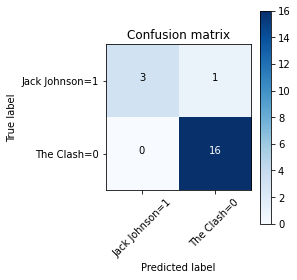

In [0]:
np.set_printoptions(precision=2)
plt.figure(figsize = (4,4))
plot_confusion_matrix(cnf_matrix, classes=['Jack Johnson=1','The Clash=0'],normalize= False,
                      title='Confusion matrix')


In [0]:
from google.colab import files
plt.savefig("abc.png")
files.download("abc.png") 

<Figure size 432x288 with 0 Axes>